In [5]:
# import useful libraries 
import pandas as pd
import matplotlib.pyplot as plt
from pandas import Grouper
import collections 
import numpy as np
import matplotlib.patches as mpatches

In [6]:
# Read in and store the data 
nba = pd.read_csv('nba_total.csv')
nba.head()

,Year,Team,G,W,L,MP,FG,FGA,FG%,3P,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,2018-19,Milwaukee Bucks*,82,60,22,19780,3555,7471,0.476,1105,...,0.773,762,3316,4078,2136,615,486,1137,1608,9686
1,2018-19,Golden State Warriors*,82,57,25,19805,3612,7361,0.491,1087,...,0.801,797,2990,3787,2413,625,525,1169,1757,9650
2,2018-19,New Orleans Pelicans,82,33,49,19755,3581,7563,0.473,842,...,0.761,909,2969,3878,2216,610,441,1215,1732,9466
3,2018-19,Philadelphia 76ers*,82,51,31,19805,3407,7233,0.471,889,...,0.771,892,3025,3917,2207,606,432,1223,1745,9445
4,2018-19,Los Angeles Clippers*,82,48,34,19830,3384,7178,0.471,821,...,0.792,796,2936,3732,1970,561,385,1193,1913,9442


In [7]:
# This function takes in a team name (as a string) and returns a dataframe consisting of all rows for that team

def create_df(team):
    noPlayoff = nba[nba['Team'] == team]
    playoff = nba[nba['Team'] == (team + "*")]

    name = noPlayoff.append(playoff)
    
    return name 


In [8]:
# This functions takes in 3 lists. 
# dfList- a list of dataframes that will be iterated through (must be size 5)
# teamList- a list of teamnames in matching order to the dataframes and the title of the list as the lst index (must be size 6)
# colList- a list of colors matching to their corresponding teams (must be size 5)
# This function returns count, the number of iterations through the dataframe list (should always be 5)

def plot_divison(dfList, teamList, colList):
    count = 0
    for team in dfList:
        g_dic = {}
        playoffs = []
        for row in range(5):
            g_dic[team.iloc[row]["Year"]] = team.iloc[row]["W"]
            if('*' in team.iloc[row]["Team"]):
                playoffs.append(team.iloc[row]["Year"])

        od = (sorted(g_dic.items()))

        x= [1,2,3,4,5]
        y = []
        yrs = []
        yrs_playoff = []
        num = 0
        for i in od:
            yrs.append(i[0])
            y.append(i[1])
            if(i[0] in playoffs):
                yrs_playoff.append(num)
            num +=1

        plt.figure(1, figsize = (15,10))
        plt.xticks(x, yrs)
        plt.plot(x,y, color = colList[count])
        for i in range(5):
            if(i in yrs_playoff):
                plt.plot(i+1, y[i], marker ='*', markersize =20, color = colList[count]) 
            else:
                plt.plot(i+1, y[i], marker = 'o', markersize =15, color = colList[count]) 
        count +=1 

    plt.ylim(5,75)
    
    t1 = mpatches.Patch(color=colList[0], label= teamList[0])
    t2 = mpatches.Patch(color=colList[1], label= teamList[1])
    t3 = mpatches.Patch(color=colList[2], label= teamList[2])
    t4 = mpatches.Patch(color=colList[3], label= teamList[3])
    t5 = mpatches.Patch(color=colList[4], label= teamList[4])
    plt.xlabel("Year", size = 15)
    plt.ylabel("Wins", size = 15)
    plt.title(teamList[5] + " Division Wins Over Time", size = 27)
    plt.legend(handles=[t1, t2, t3, t4, t5], loc = 'upper right', fancybox = True, shadow = True, facecolor = 'gainsboro', prop={'size': 12})       
    plt.show()    
        
    return (count)

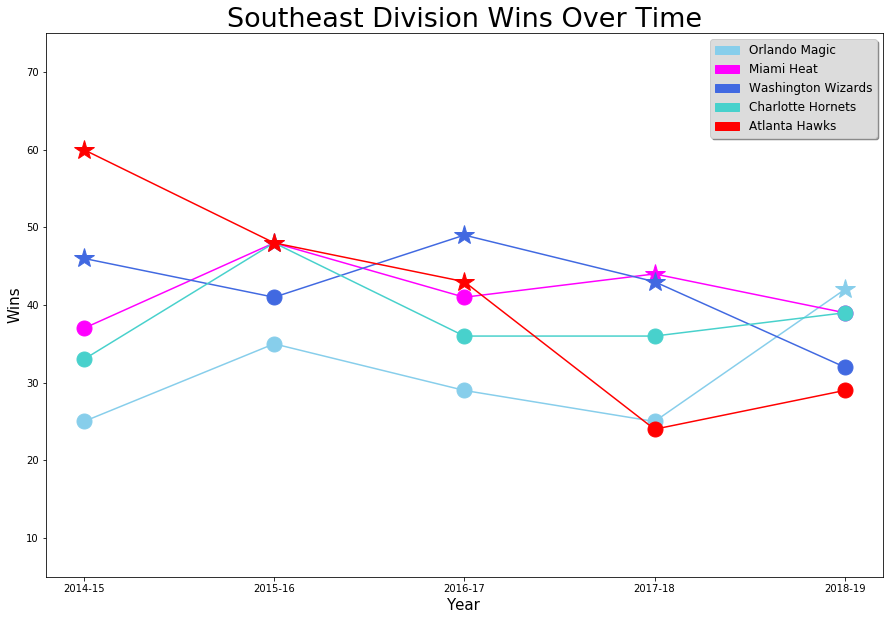

In [9]:
# Southeast Division 

# Use the create_df to create subframes for each team in the division 
magic = create_df("Orlando Magic")
heat = create_df("Miami Heat")
wizards = create_df("Washington Wizards")
hornets = create_df("Charlotte Hornets")
hawks = create_df("Atlanta Hawks")

# create the proper lists that are designed to be inputs into the plot_division function 
southeast_div = [magic, heat, wizards, hornets, hawks]
southeast_names = ["Orlando Magic", "Miami Heat", "Washington Wizards", "Charlotte Hornets", "Atlanta Hawks", "Southeast"]
southeast_colList = ['skyblue', 'fuchsia', 'royalblue', 'mediumturquoise', 'red']

# call the plot_divison function
seDIV = plot_divison(southeast_div, southeast_names, southeast_colList)

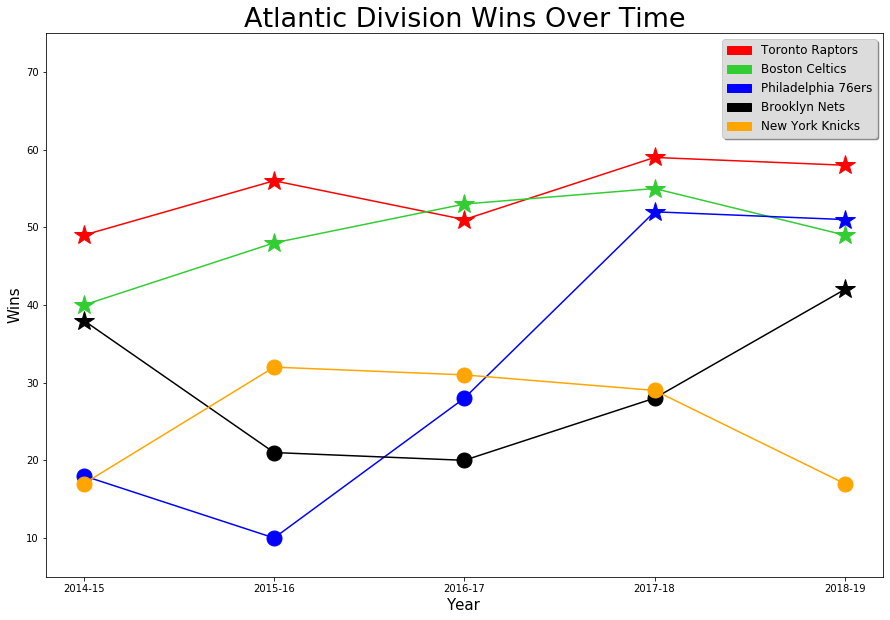

In [10]:
# Atlantic Division 

# Use the create_df to create subframes for each team in the division 
raptors = create_df("Toronto Raptors")
celtics = create_df("Boston Celtics")
sixers = create_df("Philadelphia 76ers")
nets = create_df("Brooklyn Nets")
knicks = create_df("New York Knicks")

# create the proper lists that are designed to be inputs into the plot_division function 
atlantic_div = [raptors, celtics, sixers, nets, knicks]
atlantic_names = ["Toronto Raptors", "Boston Celtics", "Philadelphia 76ers", "Brooklyn Nets", "New York Knicks", "Atlantic"]
atlantic_colList = ['red', 'limegreen', 'blue', 'black', 'orange']

# call the plot_divison function
atlDIV = plot_divison(atlantic_div, atlantic_names, atlantic_colList)


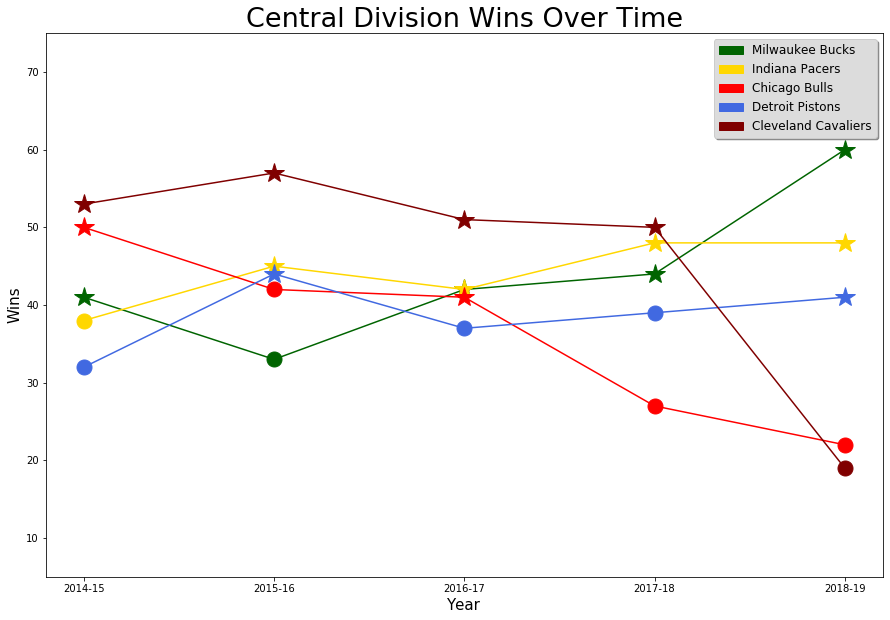

In [11]:
# Central Division 

# Use the create_df to create subframes for each team in the division 
bucks = create_df("Milwaukee Bucks")
pacers = create_df("Indiana Pacers")
bulls = create_df("Chicago Bulls")
pistons = create_df("Detroit Pistons")
cavs = create_df("Cleveland Cavaliers")

# create the proper lists that are designed to be inputs into the plot_division function 
central_div = [bucks, pacers, bulls, pistons, cavs]
central_names = ["Milwaukee Bucks", "Indiana Pacers", "Chicago Bulls", "Detroit Pistons", "Cleveland Cavaliers", "Central"]
central_colList = ['darkgreen', 'gold', 'red', 'royalblue', 'maroon']

# call the plot_divison function
cenDIV = plot_divison(central_div, central_names, central_colList)

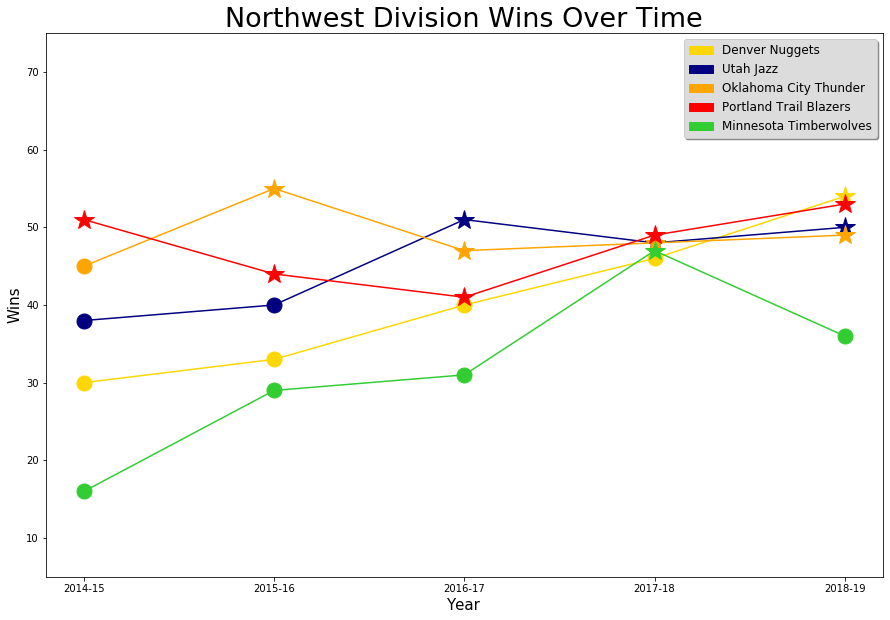

In [12]:
# Northwest Division 

# Use the create_df to create subframes for each team in the division 
nuggets = create_df("Denver Nuggets")
jazz = create_df("Utah Jazz")
thunder = create_df("Oklahoma City Thunder")
blazers = create_df("Portland Trail Blazers")
twolves = create_df("Minnesota Timberwolves")

# create the proper lists that are designed to be inputs into the plot_division function 
northwest_div = [nuggets, jazz, thunder, blazers, twolves]
northwest_names = ["Denver Nuggets", "Utah Jazz", "Oklahoma City Thunder", "Portland Trail Blazers", "Minnesota Timberwolves", "Northwest"]
northwest_colList = ['gold', 'navy', 'orange', 'red', 'limegreen']

# call the plot_divison function
nwDIV = plot_divison(northwest_div, northwest_names, northwest_colList)

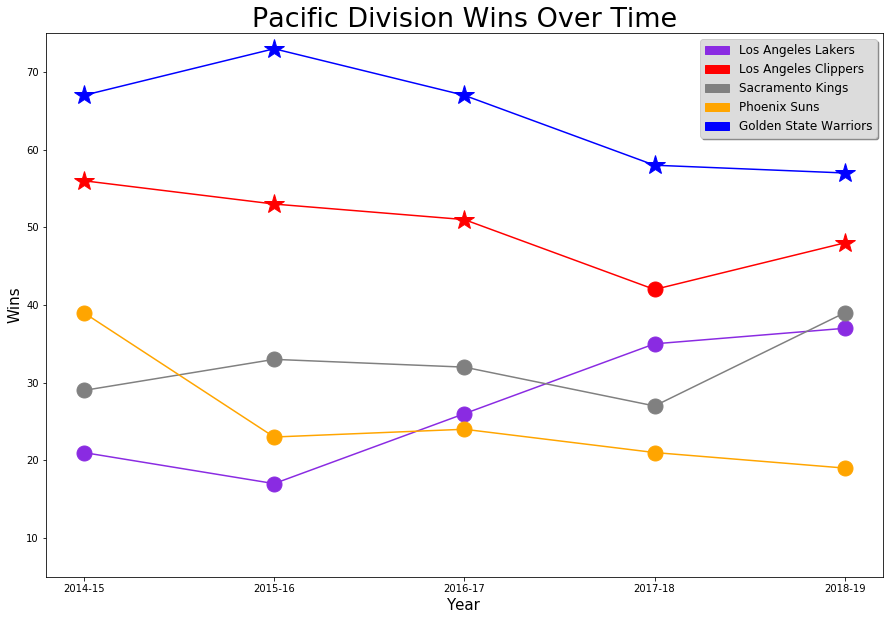

In [13]:
# Pacific Division 

# Use the create_df to create subframes for each team in the division 
lakers = create_df("Los Angeles Lakers")
clippers = create_df("Los Angeles Clippers")
kings = create_df("Sacramento Kings")
suns = create_df("Phoenix Suns")
warriors = create_df("Golden State Warriors")

# create the proper lists that are designed to be inputs into the plot_division function 
pacific_div = [lakers, clippers, kings, suns, warriors]
pacific_names = ["Los Angeles Lakers", "Los Angeles Clippers", "Sacramento Kings", "Phoenix Suns", "Golden State Warriors", "Pacific"]
pacific_colList = ['blueviolet', 'red', 'gray', 'orange', 'blue']

# call the plot_divison function
pacDIV = plot_divison(pacific_div, pacific_names, pacific_colList)

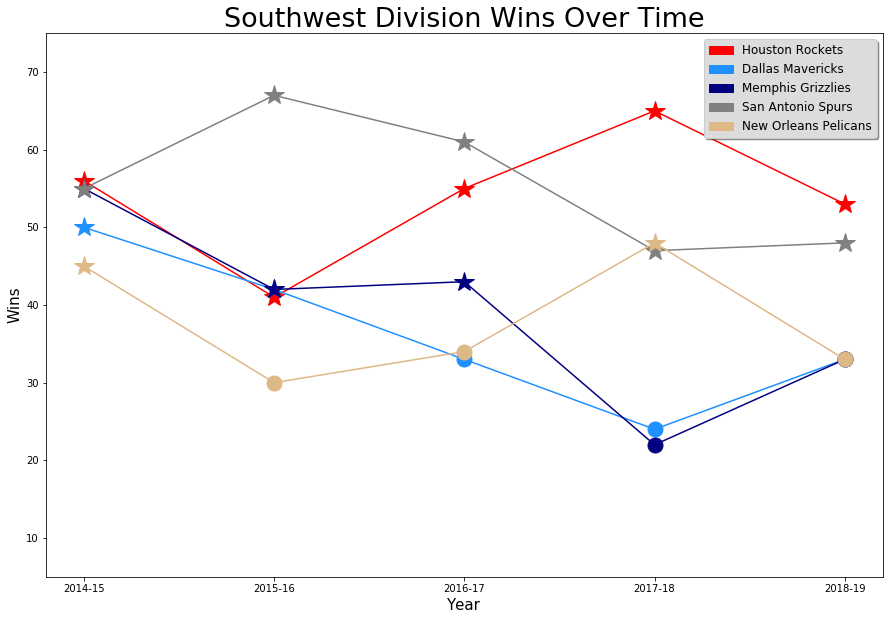

In [14]:
# Southwest Division 

# Use the create_df to create subframes for each team in the division 
rockets = create_df("Houston Rockets")
mavs = create_df("Dallas Mavericks")
grizz = create_df("Memphis Grizzlies")
spurs = create_df("San Antonio Spurs")
pelicans = create_df("New Orleans Pelicans")

# create the proper lists that are designed to be inputs into the plot_division function 
southwest_div = [rockets, mavs, grizz, spurs, pelicans]
southwest_names = ["Houston Rockets", "Dallas Mavericks", "Memphis Grizzlies", "San Antonio Spurs", "New Orleans Pelicans", "Southwest"]
southwest_colList = ['red', 'dodgerblue', 'navy', 'gray', 'burlywood']

# call the plot_divison function
swDIV = plot_divison(southwest_div, southwest_names, southwest_colList)

In [15]:
#This method runs a query of any variable against Team
#It makes a graph of any stat in the data frame high to low
#It compiles data for the 5 years we are using by team
#It returns the lowest team's value for the stat being looked at
def bestToWorst(stat):
    data=nba
    data['Team'] = data['Team'].str.replace(r'*', '')
    bois=data.groupby('Team')
    frame=bois.sum()
    frame['WL%']=frame['W']/frame['G']
    frame['2P%']=frame['2P%'].div(5)
    frame['FT%']=frame['FT%'].div(5)
    frame['3P%']=frame['3P%'].div(5)
    frame['FG%']=frame['FG%'].div(5)
    ax= frame[stat].sort_values().plot(kind='barh',figsize=(6, 8))
    ax.set_xlabel(stat, labelpad=20, weight='bold', size=12)
    ax.set_ylabel("Team Name", labelpad=20, weight='bold', size=12)
    string= stat + " from High to Low by Team"
    ax.set_title(string, weight='bold', size=12)
    return (frame[stat].min())

In [16]:
#This method runs a query of any variable against year (season)
#It makes a graph of any stat in the data frame high to low
#for the 5 years of data we used.
#It returns the lowest year's value for the stat being looked at

def bestToWorstYear(stat):
    data=nba
    data['Team'] = data['Team'].str.replace(r'*', '')
    bois=data.groupby('Year')
    frame=bois.sum()
    frame['2P%']=frame['2P%'].div(30)
    frame['FT%']=frame['FT%'].div(30)
    frame['3P%']=frame['3P%'].div(30)
    frame['FG%']=frame['FG%'].div(30)
    ax= frame[stat].sort_values().plot(kind='barh',figsize=(6, 8))
    ax.set_xlabel(stat, labelpad=20, weight='bold', size=12)
    ax.set_ylabel("Year", labelpad=20, weight='bold', size=12)
    string= stat + " from High to Low by Year"
    ax.set_title(string, weight='bold', size=12)
    return (frame[stat].min())

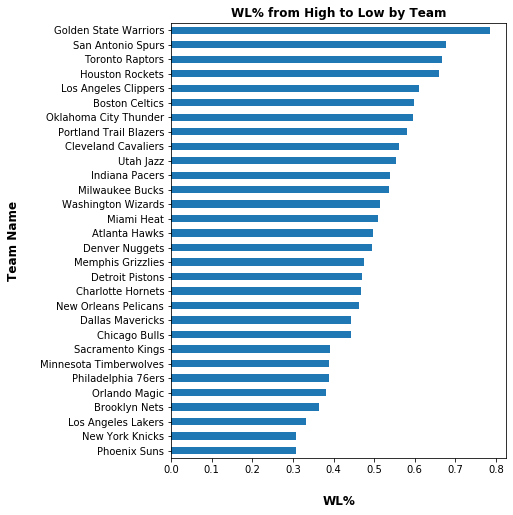

In [17]:
x=bestToWorst('WL%')

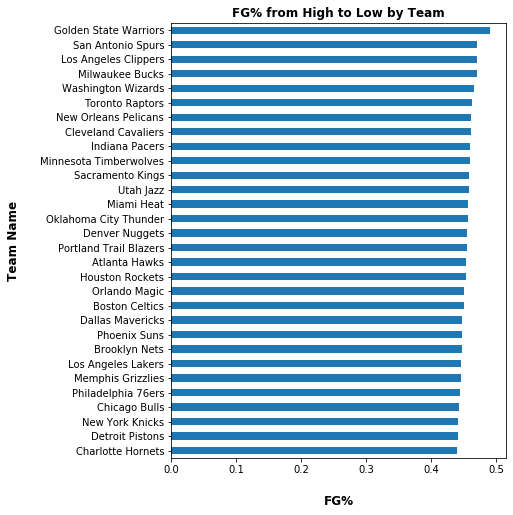

In [18]:
x=bestToWorst('FG%')

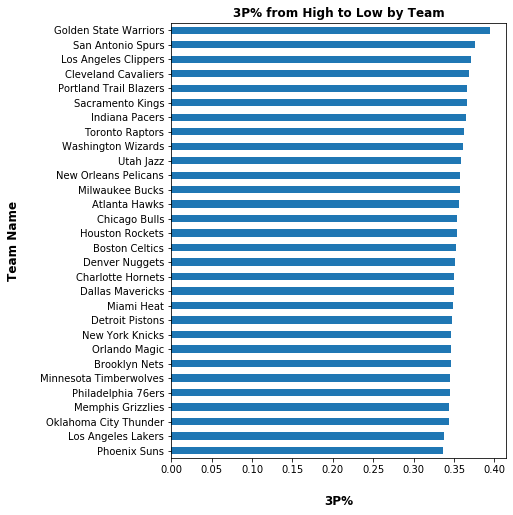

In [19]:
x=bestToWorst('3P%')

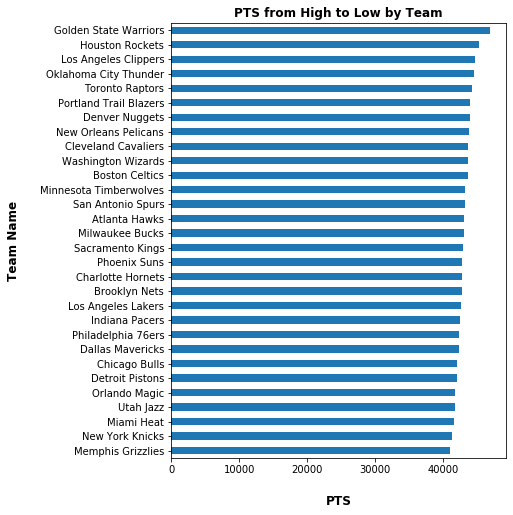

In [20]:
x=bestToWorst('PTS')

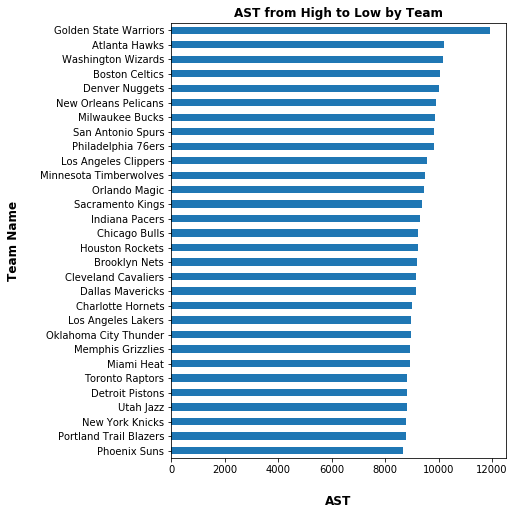

In [21]:
x=bestToWorst('AST')

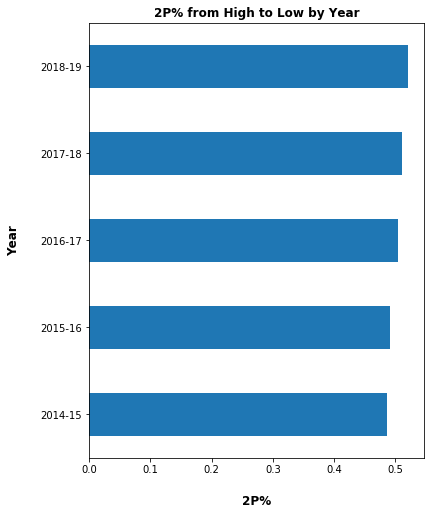

In [22]:
x=bestToWorstYear('2P%')

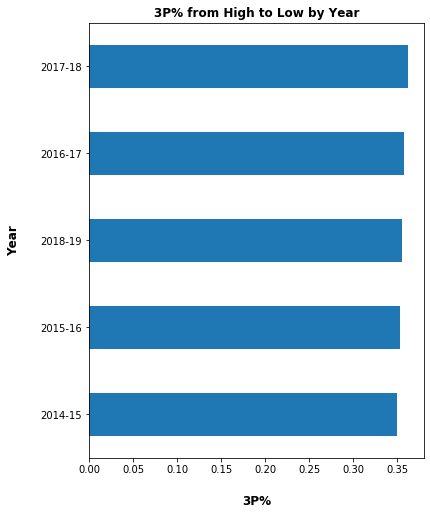

In [23]:
x=bestToWorstYear('3P%')

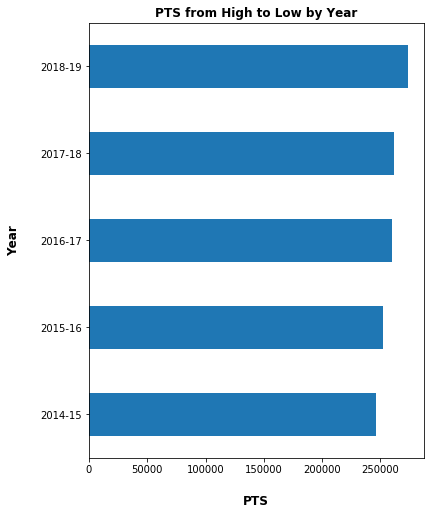

In [24]:
x=bestToWorstYear('PTS')

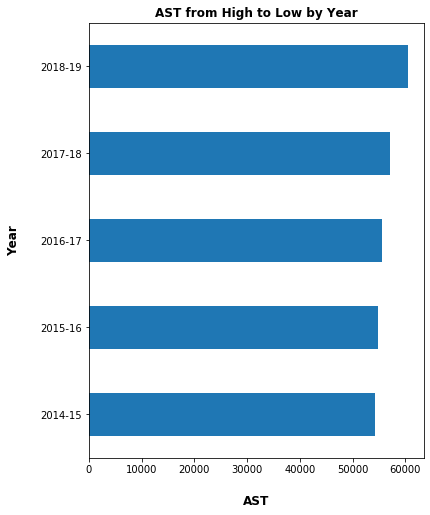

In [25]:
x=bestToWorstYear('AST')

In [56]:
# EXTRA CREDIT - Manual Input 

def userInput():
    choice = input("Enter 1 for bestToWorst, Enter 2 for bestToWorstYear: ")

    if(choice == "1"):
        stat = input("Enter one of the following stats: 'G', 'W', 'L', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS': ")
        try:
            x=bestToWorst(stat)
        except:
            print("input not recognized please try again!")
    elif(choice == "2"):
        stat = input("Enter one of the following stats: 'G', 'W', 'L', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS': ")
        try:
            x=bestToWorstYear(stat)
        except:
            print("input not recognized please try again!")
    else:
        print("input not recognized please try again!")
    

Enter 1 for bestToWorst, Enter 2 for bestToWorstYear: 1
Enter one of the following stats: 'G', 'W', 'L', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS': TRB


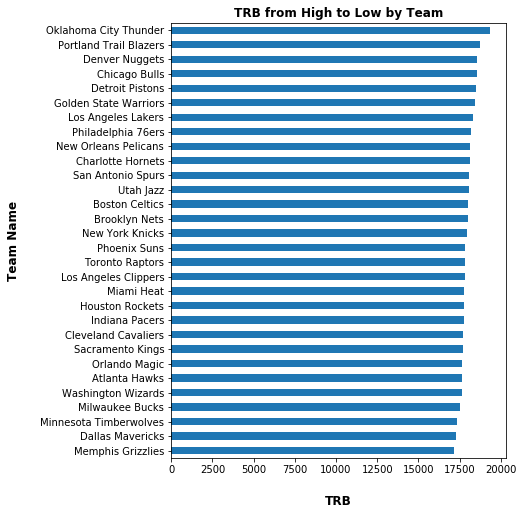

In [61]:
userInput()